# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# Display the data table for preview
merge_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
number_mice = pd.value_counts(merge_data["Mouse ID"].unique()).sum()
number_mice


249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# This code identifies there is dumplicate data by Mouse ID and Timepoint
duplicate_mouse= merge_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_mouse.unique()

array([False,  True])

In [24]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data.loc[duplicate_mouse,'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [63]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = merge_data.loc[merge_data["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_data.loc[merge_data["Mouse ID"] != "g989"]
clean_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice in the clean DataFrame.
#total_mice= len(clean_data_df["Mouse ID"].unique())
total_mice= clean_data_df["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumorvolume = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume")
#print(mean_tumorvolume)
median_tumorvolume = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().rename("Median Tumor Volume")
#print(median_tumorvolume)
variance_tumorvolume = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().rename("Tumor Volume Variance")
#print(variance_tumorvolume)
stdev_tumorvolume = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().rename("Tumor Volume Std Dev.")
#print(stdev_tumorvolume)
sem_tumorvolume = clean_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().rename("Tumor Volume Std. Err.")
#print(sem_tumorvolume)

drug_statistic = pd.concat([mean_tumorvolume, median_tumorvolume, variance_tumorvolume, stdev_tumorvolume, sem_tumorvolume], axis =1)
drug_statistic



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advance_method = clean_data_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median",\
    "var", "std", "sem"]})
advance_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

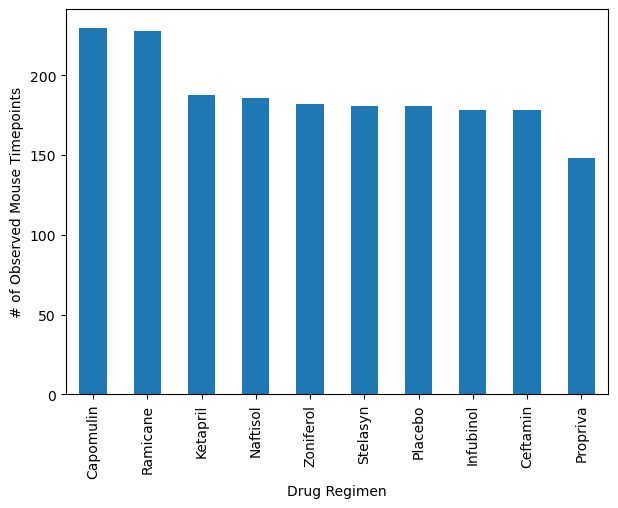

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_vs_mice = clean_data_df["Drug Regimen"].value_counts()
figure2= drug_vs_mice.plot(kind="bar", figsize=(7,5))
figure2.set_ylabel("# of Observed Mouse Timepoints")
figure2.set_xlabel("Drug Regimen")

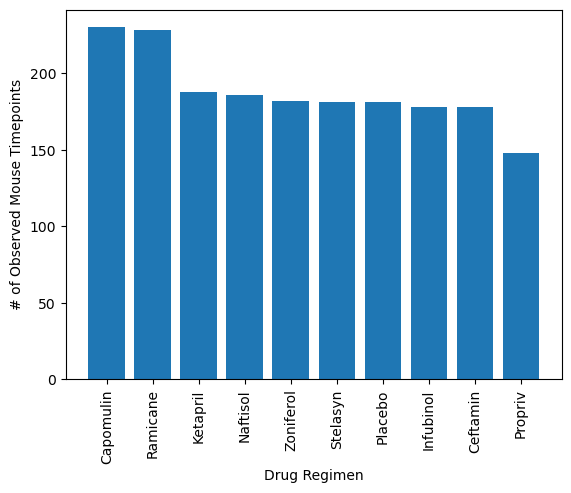

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names=["Capomulin","Ramicane","Ketapril", "Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriv"]
x_axis= np.arange(len(drug_names))
x_axis

drug_vs_mice = clean_data_df["Drug Regimen"].value_counts()
my_list= list(drug_vs_mice)
my_list

tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.bar(x_axis, my_list, align='center')

plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

(-1.0999856602502884,
 1.0999988707648147,
 -1.09999862784536,
 1.0999820485342267)

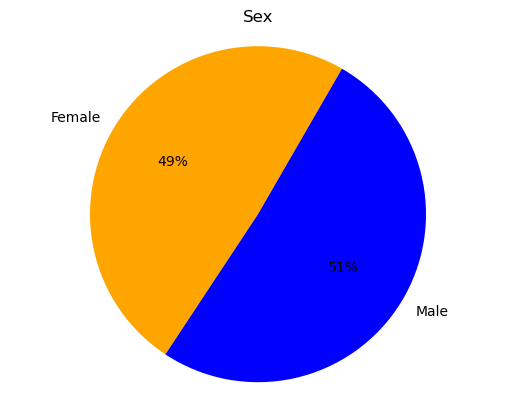

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data_df.groupby("Sex").size()
my_list1=list(gender)

gender_name =["Female", "Male"]
colours= ["orange", "blue"]

gender.plot(kind="pie", title="Sex", autopct="%1.f%%", startangle=60, labels=gender_name, colors= colours,)
plt.axis("equal")


Text(0.5, 1.0, 'Sex')

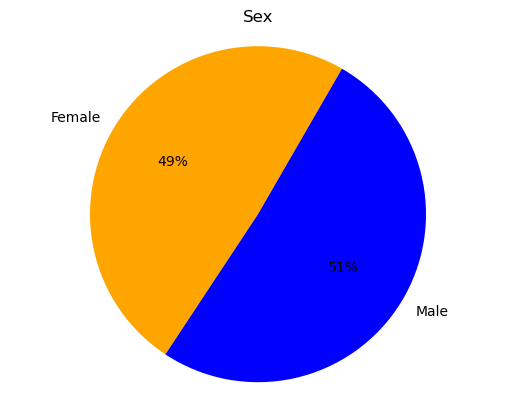

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(my_list1, labels=gender_name, colors= colours, autopct="%1.f%%", startangle=60)
plt.axis("equal")
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_volume = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
max_tumor_volume
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_vol_data=pd.merge(max_tumor_volume,clean_data_df, on=["Mouse ID", "Timepoint"], how="left")
max_vol_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = max_vol_data.loc[merge_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


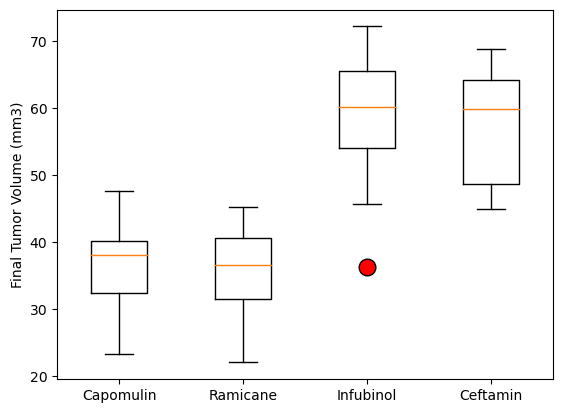

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outliers = dict(marker="o", markerfacecolor='r',markersize=12)
plt.boxplot(tumor_vol_list, labels = drug_list,flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [89]:
# clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin","Mouse ID"].unique()
clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]["Mouse ID"].unique()


array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

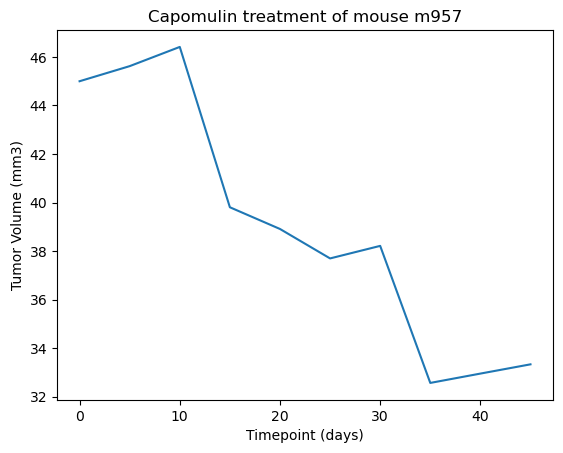

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == "Capomulin"]
mouse_ID = capomulin_df.loc[capomulin_df['Mouse ID']== 'm957']
plt.plot(mouse_ID['Timepoint'],mouse_ID['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse m957')
plt.show()


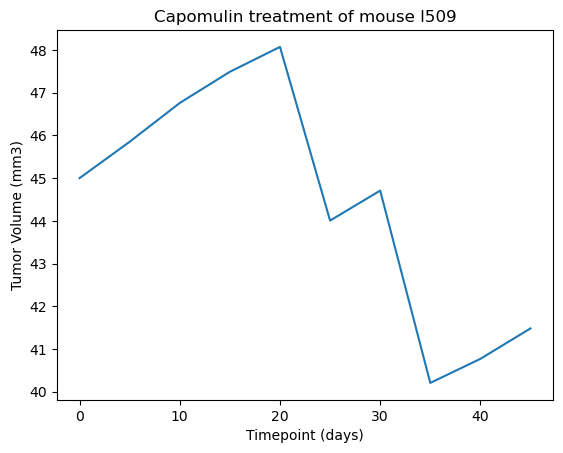

In [96]:
mouse_ID_2 = capomulin_df.loc[capomulin_df['Mouse ID']== 'l509']
plt.plot(mouse_ID_2['Timepoint'],mouse_ID_2['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

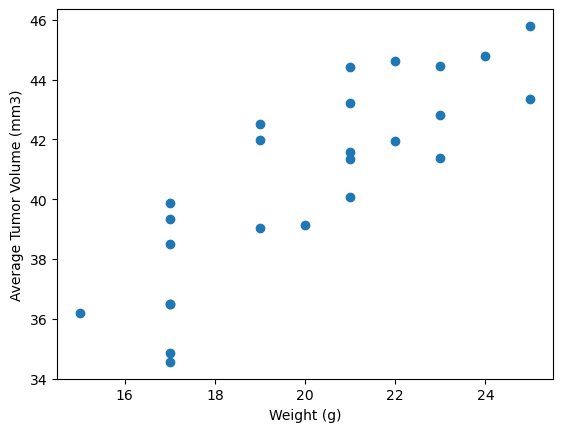

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# The correlation coefficient
correlation=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")


The correlation between mouse weight and the average tumor volume is 0.84


In [103]:
# The linear regression model
linear_regression = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
linear_regression
slope = linear_regression[0]
intercept = linear_regression[1]

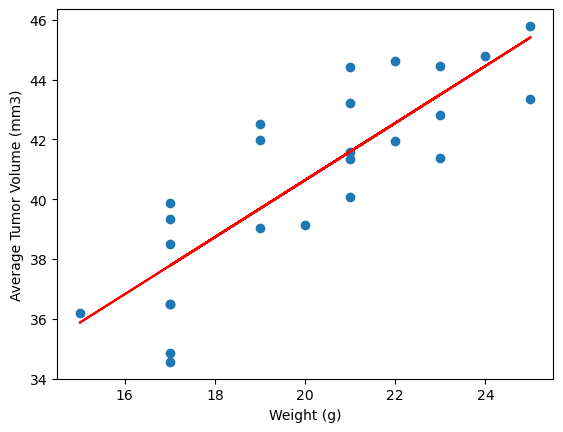

In [104]:
y_values = capomulin_average['Weight (g)']*slope + intercept
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()